# Netflix Business Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("Netfix_data.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# EDA

In [ ]:
df.shape

(8807, 12)

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Data cleaning & Profiling

In [ ]:
print(df.isnull().any())

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool


In [ ]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [ ]:
total_null=(df.isnull().sum().sum())
total_null

np.int64(4307)

In [ ]:
null_percentage=(np.round(df.isnull().sum()/len(df)*100),4)
null_percentage

(show_id          0.0
 type             0.0
 title            0.0
 director        30.0
 cast             9.0
 country          9.0
 date_added       0.0
 release_year     0.0
 rating           0.0
 duration         0.0
 listed_in        0.0
 description      0.0
 dtype: float64,
 4)

In [ ]:
df['director'].fillna('No Director',inplace=True)
df['cast'].fillna('No Cast',inplace=True)
df['country'].fillna('No Country',inplace=True)

In [ ]:
df.dropna(subset=['date_added','duration','rating'],inplace=True)

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


#1
How has the number of movies released per year changed over the last 20-30 years?

In [105]:
movie_data=df.loc[df['type']=='Movie']
movie_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",No Country,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [110]:
movie_data['release_year'].max()

2021

In [111]:
movie_data['release_year'].min()

1942

In [108]:
yr_wise=movie_data['release_year'].value_counts()
yr_wise.sort_values(ascending=False).head(30).reset_index()

,release_year,count
0,2018,767
1,2017,765
2,2016,658
3,2019,633
4,2020,517
5,2015,396
6,2021,277
7,2014,264
8,2013,225
9,2012,173


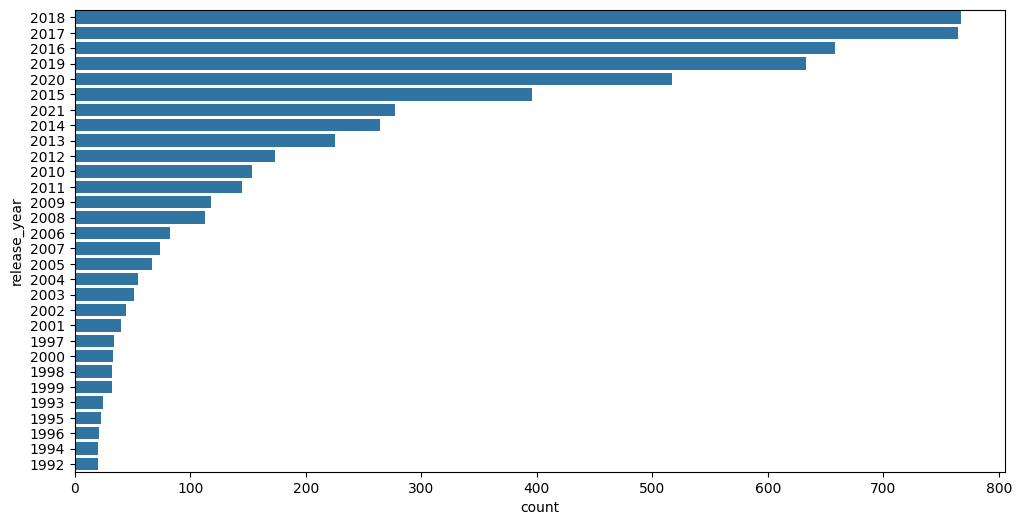

In [109]:
plt.figure(figsize=(12,6))
sns.countplot(y="release_year",
              data=movie_data,
              order=movie_data['release_year'].value_counts().index[:30]
              )
plt.show()

**INSIGHTS :-**


*   Mostly increase in numbers of movie releases through the decades.
*    In statring year of company 1992 is lowest meanwhile in 2008 for the first time company crosses 100 milestone .

*   Highest movies were produced in years of 2017 & 2018.
*   We could see a dip in numbers of movie releases from 2019 and it continus till 2021.







#2
Comparison of tv shows vs. movies.

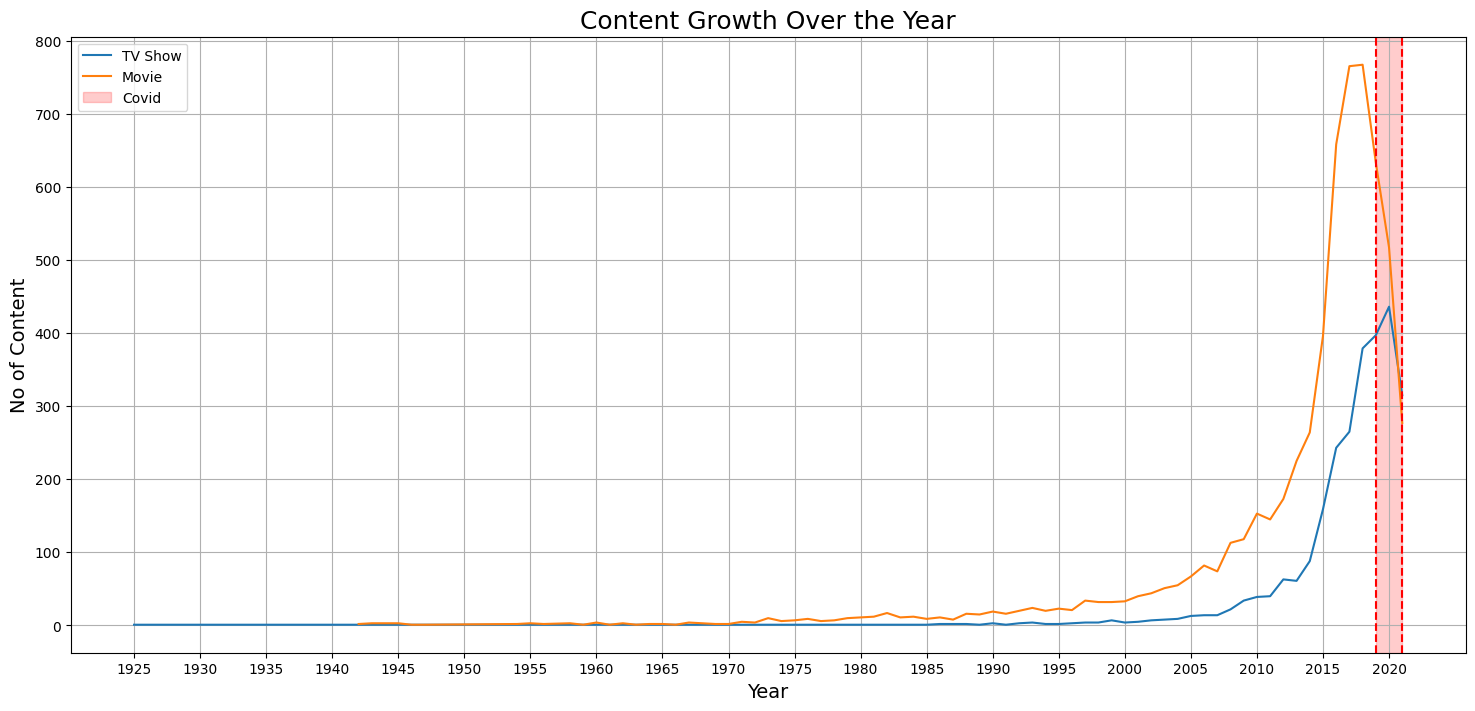

In [ ]:
from matplotlib.lines import lineStyles

TV=df.loc[df['type']=='TV Show']
movie=df.loc[df['type']=='Movie']

TV_showprogress=TV['release_year'].value_counts().sort_index()
movie_showprogress=movie['release_year'].value_counts().sort_index()


plt.figure(figsize=(18,8))
plt.plot(TV_showprogress.index,TV_showprogress.values,label='TV Show')
plt.plot(movie_showprogress.index,movie_showprogress.values,label='Movie')

plt.axvline(2019,linestyle='--',color='r')
plt.axvline(2021,linestyle='--',color='r')
plt.axvspan(2019,2021,alpha=0.2,color='r',label='Covid')

plt.title('Content Growth Over the Year',fontsize=18)
plt.xlabel('Year',fontsize=14)
plt.ylabel('No of Content',fontsize=14)

plt.xticks(range(1925,2025,5))
plt.legend()
plt.grid()



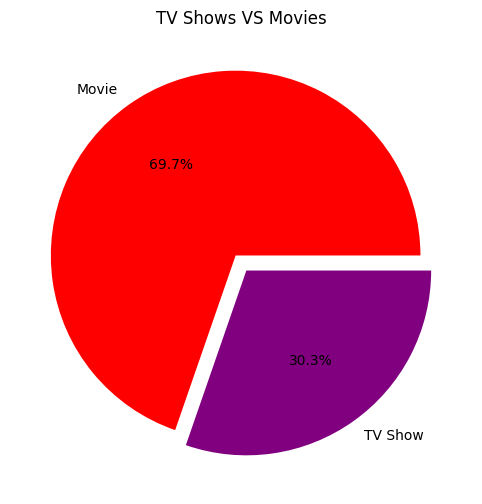

In [ ]:
plt.figure(figsize=(12,6))
plt.title('TV Shows VS Movies')
plt.pie(df["type"].value_counts(),explode=(0.05,0.05),labels=df["type"].value_counts().index,colors=['red','purple'],autopct='%.1f%%')
plt.show()

**INSIGHTS :-**


*   While movie aquire 69.7% ,TV show aquire 30.3%  
*   Their was a certain rise in high number of movie releases  rather than TV show.





#3
What is the best time to launch a TV show?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [ ]:
df['date_added'].nunique()

1765

In [ ]:
df["date_added"] = df["date_added"].str.strip()
df["date_added"] = pd.to_datetime(df["date_added"])

In [ ]:
df1=df.copy()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 892.7+ KB


In [ ]:
df1["year"]=df1["date_added"].dt.year
df1["month"]=df1["date_added"].dt.month
df1["date"]=df1["date_added"].dt.day
df1["week"]=df1["date_added"].dt.isocalendar().week.astype("int32")

In [ ]:
TV_data=df.loc[df['type']=='TV Show']

In [ ]:
print(df1.groupby('year')['title'].nunique().reset_index())

    year  title
0   2008      2
1   2009      2
2   2010      1
3   2011     13
4   2012      3
5   2013     11
6   2014     24
7   2015     82
8   2016    426
9   2017   1185
10  2018   1648
11  2019   2016
12  2020   1879
13  2021   1498


    week  title
0      1    372
1      2    108
2      3    113
3      4     87
4      5    207
5      6     97
6      7    147
7      8    110
8      9    253
9     10    135
10    11    163
11    12    109
12    13    250
13    14    172
14    15    152
15    16    160
16    17    154
17    18    234
18    19    116
19    20    131
20    21    117
21    22    206
22    23    151
23    24    164
24    25    143
25    26    268
26    27    240
27    28    130
28    29    140
29    30    160
30    31    268
31    32    122
32    33    152
33    34    143
34    35    263
35    36    142
36    37    182
37    38    139
38    39    166
39    40    287
40    41    116
41    42    135
42    43    116
43    44    318
44    45     98
45    46    134
46    47    120
47    48    198
48    49    140
49    50    189
50    51    137
51    52    132
52    53    104


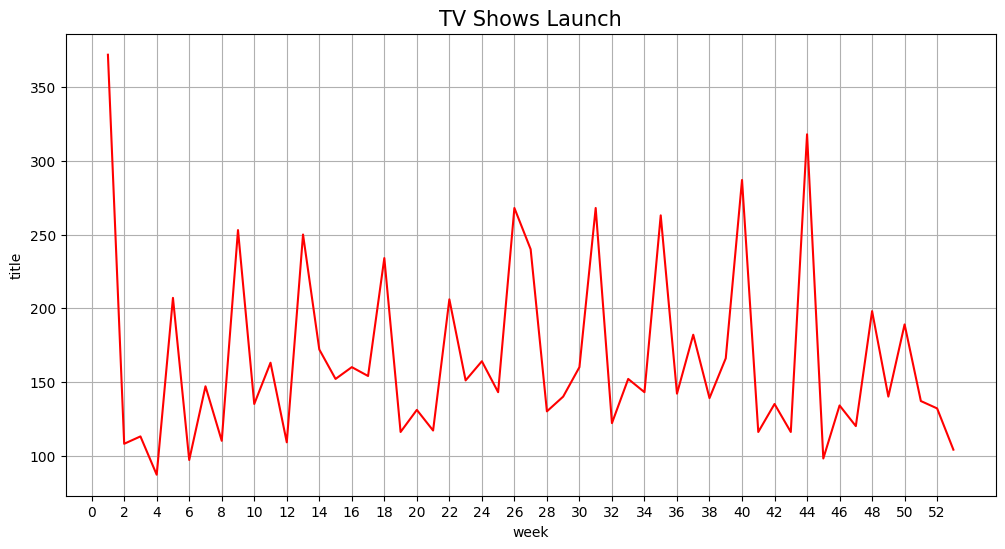

In [ ]:
df_week=df1.groupby('week')['title'].nunique().reset_index()
print(df_week)

plt.figure(figsize=(12,6))
plt.title('TV Shows Launch',fontsize=15)
sns.lineplot(data=df_week,x='week',y='title',color='red')
plt.xticks(range(0,54,2),fontsize=10)
plt.grid()
plt.show()

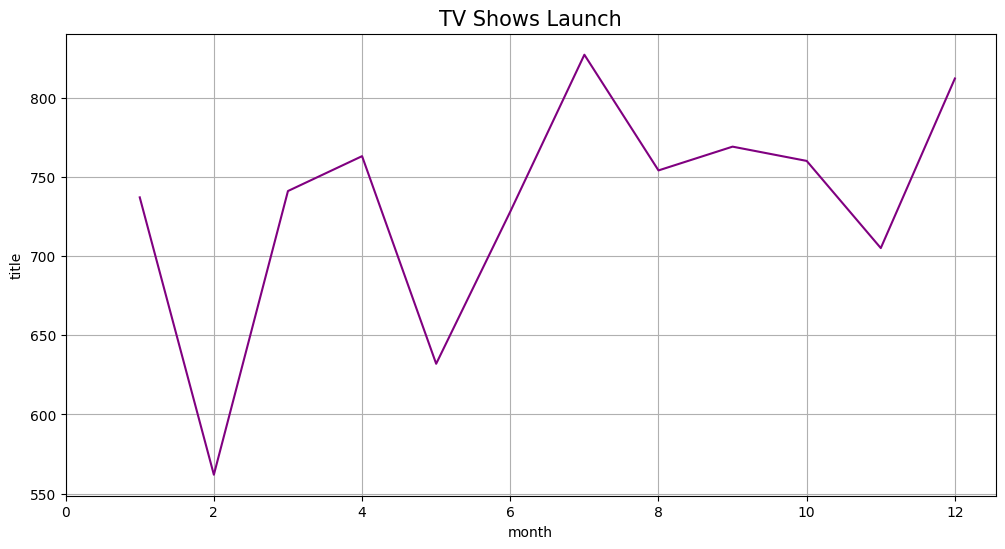

In [ ]:
df_month=df1.groupby('month')['title'].nunique().reset_index()

plt.figure(figsize=(12,6))
plt.title('TV Shows Launch',fontsize=15)
sns.lineplot(data=df_month,x='month',y='title',color='purple')
plt.xticks(range(0,14,2),fontsize=10)
plt.grid()
plt.show()

**INSIGHTS :-**


*   March,April,June,July,August & November is best month for release TV shows.
*   Week 1 ,26,44 is best time for TV shows launch.





#4
Analysis of actors/directors of different types of shows/movies.



* separate tv show and movie
* popular director in tv shows
* popular director in movies
* popular actor in tv shows
* popular actor in movies




In [ ]:
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,date,week
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,25,38
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,24,38
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,24,38
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,No Country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,24,38
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,24,38


In [85]:
TV=df.loc[df['type']=='TV Show']
movie=df.loc[df['type']=='Movie']

# Remove missing values
df_dir = df.dropna(subset=['director'])
df_cast = df.dropna(subset=['cast'])

# Split multiple names into rows
df_dir['Director'] = df_dir['director'].str.split(', ')
df_cast['Cast'] = df_cast['cast'].str.split(', ')

df_dir = df_dir.explode('director')
df_cast = df_cast.explode('cast')


         type                director  Count
4502  TV Show             No Director   2434
2930    Movie             No Director    187
3251    Movie           Rajiv Chilaka     19
3302    Movie  Raúl Campos, Jan Suter     18
3884    Movie             Suhas Kadav     16


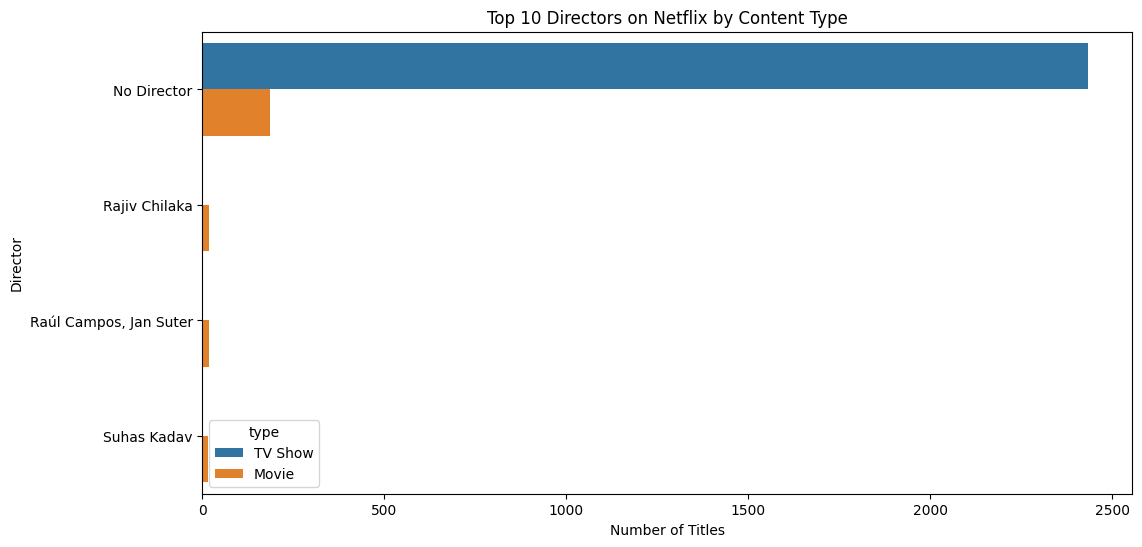

In [91]:
# popular director in tv shows
# popular director in movies

top_directors = (
    df_dir.groupby(['type', 'director'])
    .size()
    .reset_index(name='Count')
    .sort_values('Count', ascending=False)
)

print(top_directors.head(5))

plt.figure(figsize=(12,6))
sns.barplot(
    data=top_directors.head(5),
    x='Count',
    y='director',
    hue='type'
)
plt.title("Top 10 Directors on Netflix by Content Type")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()


         type                                               cast  Count
3781    Movie                                            No Cast    475
7041  TV Show                                            No Cast    350
5946  TV Show                                 David Attenborough     14
5187    Movie  Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...     13
4483    Movie                                        Samuel West     10


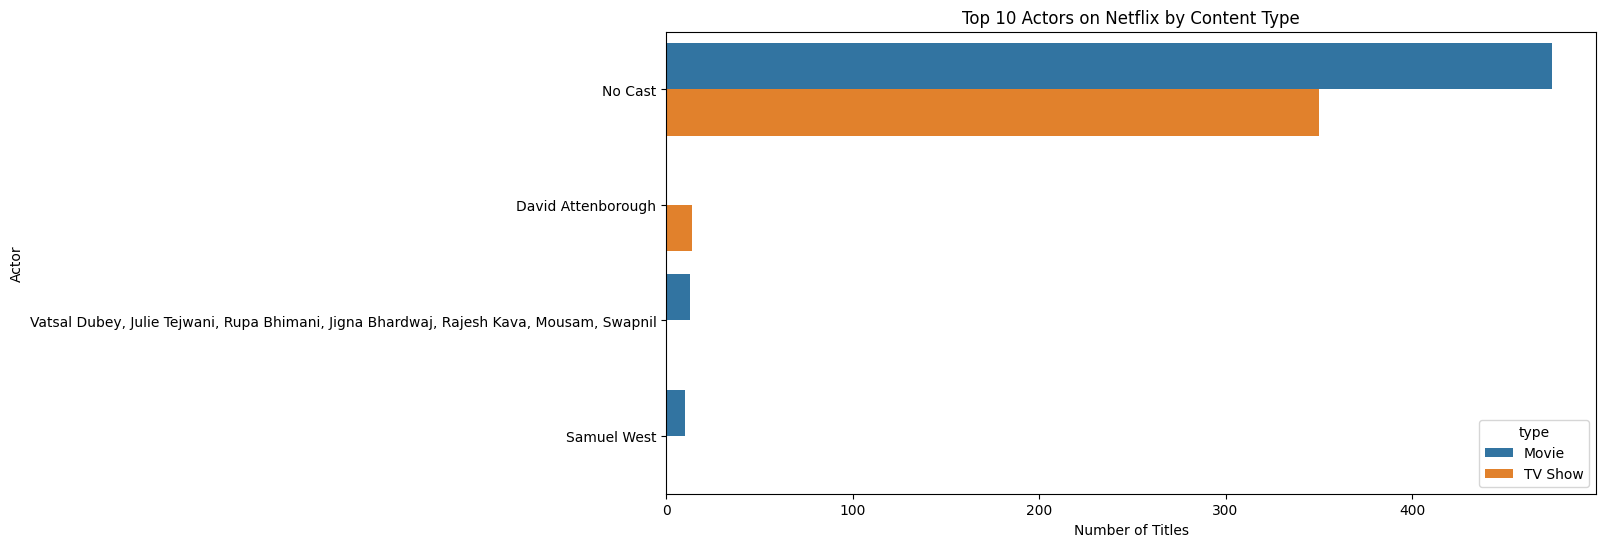

In [95]:
# popular actor in tv shows
# popular actor in movies

top_actors = (
    df_cast.groupby(['type', 'cast'])
    .size()
    .reset_index(name='Count')
    .sort_values('Count', ascending=False)
)

print(top_actors.head(5))

plt.figure(figsize=(12,6))
sns.barplot(
    data=top_actors.head(5),
    x='Count',
    y='cast',
    hue='type'
)
plt.title("Top 10 Actors on Netflix by Content Type")
plt.xlabel("Number of Titles")
plt.ylabel("Actor")
plt.show()


**INSIGHTS :-**


*   Some directors dominate movies (e.g. Bollywood/Hollywood film makers)

*   Some directors focus heavily on TV shows (series specialists)

* Netflix can:

  *  Re-hire high-performing directors

   * Build exclusive deals with popular actors

   * Target actors who succeed in both formats
  





#5
Does Netflix has more focus on TV Shows than movies in recent years



*    First we have to compare the movie and tv show launch through the year.
*    Then we can define on what netflix is more focused.
   



In [ ]:
df=df1.copy()

In [ ]:
TV=df.loc[df['type']=='TV Show']
movie=df.loc[df['type']=='Movie']


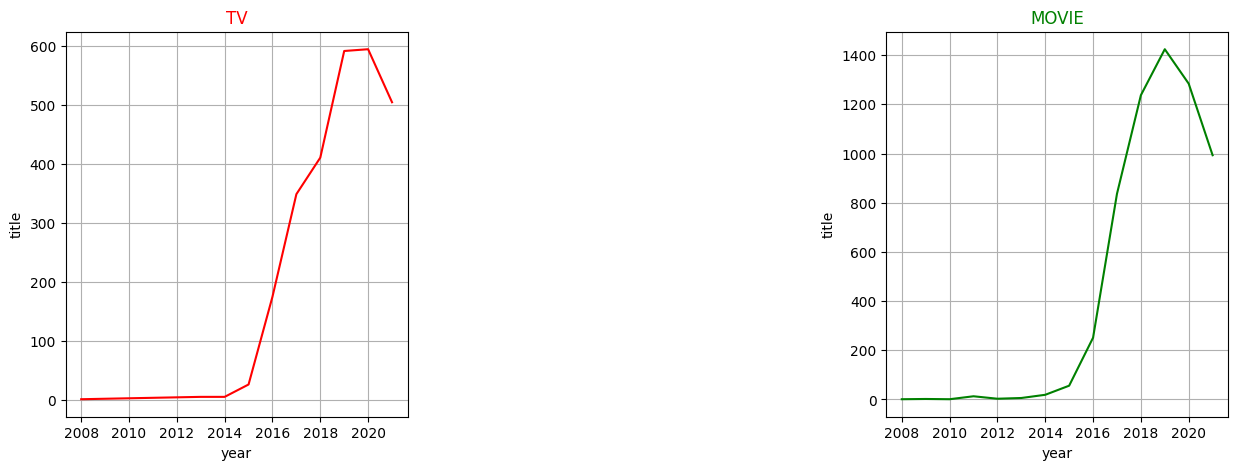

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
df_year=TV.groupby('year')['title'].nunique().reset_index()
sns.lineplot(data=df_year,x='year',y='title',color="r")
plt.title("TV",color="r")
plt.grid()

plt.subplot(1,3,3)
df_year=movie.groupby('year')['title'].nunique().reset_index()
sns.lineplot(data=df_year,x='year',y='title',color="g")
plt.title("MOVIE",color="g")
plt.grid()

**INSIGHTS :-**

* Movie release numbers are more than 2x from TV shows release number.
* TV shows hightest release number was around 600 while movie release number was around 1400.
*  As we can see netflix didn't focus more on the tv show.
*  It focus more on movie through out the years.






# 6
Understanding what content is available in different countries

In [ ]:
df_country = df.copy()
df_country['country'] = df_country['country'].str.split(', ')
df_country = df_country.explode('country')


df_genre = df_country.copy()
df_genre['listed_in'] = df_genre['listed_in'].str.split(', ')
df_genre = df_genre.explode('listed_in')


In [103]:
print("india",df_genre[df_genre['country'] == 'India']['listed_in'].value_counts().head())

india listed_in
International Movies    864
Dramas                  662
Comedies                323
Independent Movies      167
Action & Adventure      137
Name: count, dtype: int64


In [102]:
print("United States",df_genre[df_genre['country'] == 'United States']['listed_in'].value_counts().head())

United States listed_in
Dramas                      835
Comedies                    680
Documentaries               511
Action & Adventure          404
Children & Family Movies    390
Name: count, dtype: int64


In [104]:
print("South Africa",df_genre[df_genre['country'] == 'South Africa']['listed_in'].value_counts().head())

South Africa listed_in
International Movies    39
Dramas                  21
Comedies                17
Action & Adventure      12
Romantic Movies         10
Name: count, dtype: int64


**INSIGHTS :-**


*   In India & South africa we could see international movies dominent in content type.
*   India produces more independent movies from any country.
*   While in USA Dramas are more dominating.
*   In comparision south africa has very less number of content release from both USA & India.



